<center><img src="./images/rtu_logo_lv.png" alt="RTU" title="RTU" width="150em"/></center>

<center><b>RĪGAS TEHNISKĀ UNIVERSITĀTE</b></center>
<center><b>DATORZINĀTNES UN INFORMĀCIJAS TEHNOLOĢIJAS FAKULTĀTE</b></center>
<center><b>Priekšmeta "Ievads mākslīgos neironu tīklos"</b></center><center>

<center><b>3. mājasdarbs</b></center>

<div style="text-align: right">
    LDsI 12300 Lietišķo datorsistēmu institūts<br>
    RDBD0 Datorsistēmas<br>
    <b>3. kursa 3. grupas</b> pilna laika klātienes <b>students</b><br>
    Oļegs Korsaks<br>
    <b>Studenta apliecības Nr.: </b>051RDB146<br>
</div>
<center><b>Rīga, 2021</b></center>
<div style="display:none">\pagebreak</div>

***

## Saturs

* [Risināma uzdevuma nostādne](#Risināma-uzdevuma-nostādne-)
    * [Datu kopas apraksts](#Datu-kopas-apraksts)
    * [Veicamā uzdevuma būtība](#Veicamā-uzdevuma-būtība)
* [Eksperimentu mērķis un plāns](#Eksperimentu-mērķis-un-plāns)
* [Datu ielāde](#Datu-ielāde)
    * [Datu analīze](#Datu-analīze)
* [Apmācības kļūdas konverģences novērošana iterācijām un iegūto rezultātu analīze](#Apmācības-kļūdas-konverģences-novērošana-iterācijām-un-iegūto-rezultātu-analīze)
    * [Lineāras regressijas metode](#Lineāras-regressijas-metode)
    * [Klasifikācijas metode](#Klasifikācijas-metode)
* [Iegūto rezultātu analīze](#Iegūto-rezultātu-analīze)
* [Secinājumi](#Secinājumi)

## Risināma uzdevuma nostādne <a class="anchor" id="chapter1"></a>

1. Izvēlēties uzdevumu un sagatavot datu kopu ar vismaz 20 ierakstiem, kuriem jābūt aprakstītiem ar vismaz diviem skaitliskiem atribūtiem.
2. Izveidot viendimensiālo (vai 2D) SOM tīklu ar vismaz trim neironiem. Izmantojiet apmācības koeficientu ŋ=0.1.
3. Apmācīt neironu tīklu, izmantojot izvēlētā varianta datus.
4. Augstākam novērtējumam: realizēt SOM tīkla apmācību, kas paredz topoloģiskās apkaimes Sw(t) un attiecīgās enerģijas aprēķināšanu blakus neironu svaru koriģēšanai.
5. „Paspēlēties” ar SOM, mainot apmācības koeficientu (piem. ŋ=0.3;0.5;0.7;0.9).
6. Atskaitē atbildēt uz jautājumiem:
    * Kurā brīdī (iterācijas numurs) tīklu var uzskatīt par apmācītu?
    * Kā apmācības koeficients ietekmē kļūdas konverģenci?
    * Paskaidrojiet, kā var koriģēt apmācības koeficientu, lai ātrāk apmācītu tīklu?
    * Parādiet, kā dati tika klasterizēti (vismaz aprakstiet, no kādiem elementiem sastāv klasteri).
7. Rezultātus noformēt atskaites formā.

Izvēlējos: Variants II. Medicīniskai iestādei ir nepieciešams klasterizēt pacientus trijās grupās pēc viņu svara
un auguma.

In [33]:
from random import random

import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('notebook', font_scale=2.0)
sns.set_style('darkgrid')

from matplotlib import pyplot as plt

%matplotlib inline

In [34]:
CLUSTER_COUNT = 3
LEARNING_RATE = 0.1
EPOCHS = 2000

### Dati

In [35]:
# Patient: Weight, Height

data = {
    'VU1': (77, 170),
    'VU2': (1452, 110),
    'VU3': (20345, 178),
    'VU4': (1024, 150),
    'VU5': (7341, 153),
    'VU6': (4205, 121),
    'VU7': (1452, 181),
    'VU8': (20345, 130),
    'VU9': (1024, 165),
    'VU10': (7341, 161),
    'VU11': (61, 148),
    'VU12': (59, 141),
    'VU13': (40, 118),
    'VU14': (61, 133),
    'VU15': (81, 120),
    'VU16': (94, 171),
    'VU17': (110, 200),
    'VU18': (94, 160),
    'VU19': (444, 182),
    'VU20': (333, 191),
    'VU21': (834, 171),
    'VU22': (43, 145),
    'VU23': (10000, 150),
    'VU24': (1045, 201),
    'VU25': (4587, 210),
}
samples = tuple(data.values())

Paskatīsimies uz datu sadalījumu

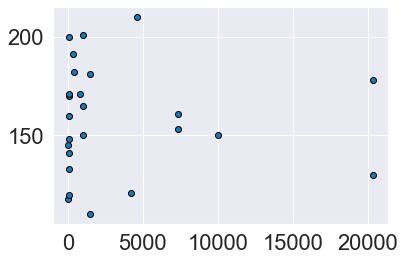

In [36]:
x = [item[0] for item in samples]
y = [item[1] for item in samples]
plt.scatter(x, y, linewidth=1, edgecolors='black')
plt.show()

Dažiem te ir vajadzīga nopietna dieta.

In [42]:
neurons = (
    [10000, 200],
    [17000, 20],
    [20, 20],
)
neuron_colors = (
    ('red', 'green', 'yellow')
)

In [43]:
neuron_count, feature_count = len(neurons), len(samples[0])
weights = tuple(
    tuple(
        [random() for _ in range(feature_count)] for _ in range(neuron_count)
    ) for _ in range(len(samples))
)

print(weights)

(([0.524424326380198, 0.507813548006619], [0.2943854208423219, 0.09052378615871792], [0.5526170319337815, 0.3258285751253851]), ([0.7635630136077952, 0.15623719332616526], [0.2507472532935191, 0.6104315750921172], [0.43577078987534545, 0.9075650721515578]), ([0.8368377452768835, 0.8053672133813181], [0.9564115167149855, 0.06630489900649428], [0.46585782414848365, 0.5512039296184263]), ([0.9725052660087687, 0.9434171453637324], [0.5151595048128195, 0.16686171962947893], [0.5154941821995662, 0.26544358671387225]), ([0.22544485012819881, 0.6578724578243551], [0.30312299274370935, 0.700560851325351], [0.8502936026957503, 0.4775400368426448]), ([0.8400451609182816, 0.4796961112876451], [0.7932582739471471, 0.23574515115181405], [0.9609593102118835, 0.6546837179461751]), ([0.14496204037574156, 0.44884946531913716], [0.69101972492106, 0.17735703835732242], [0.4021102091334342, 0.7246780571844068]), ([0.12623017697085748, 0.6410102535064082], [0.3223246969147143, 0.20112310842604864], [0.40132

In [32]:
def fit(weights: tuple[tuple[list[float]]], samples: tuple[list[float]], learning_rate: float):
    punkts = gadijumaPunkt()
    bmu_distance = float('inf')
    bmu_row_idx = 0
    bmu_col_idx = 0
    bmu_weight_vector = None

    for row_idx, weight_row in enumerate(weights):
        for col_idx, weight_vector in enumerate(weight_row):
            distance = math.sqrt((punkts[0]-weight_vector[0])**2 + (punkts[1]-weight_vector[1])**2)

            if distance < bmu_distance:
                bmu_distance = distance
                bmu_row_idx = row_idx
                bmu_col_idx = col_idx
                bmu_weight_vector = weight_vector

    bmu_weight_vector[0] = bmu_weight_vector[0] + learning_rate*(punkts[0]-bmu_weight_vector[0])
    bmu_weight_vector[1] = bmu_weight_vector[1] + learning_rate*(punkts[1]-bmu_weight_vector[1])

    for di in (-1, 0, 1):
        for dj in (-1, 0, 1):
            if di==0 and dj==0:
                continue
                
            row_idx = bmu_row_idx + di
            col_idx = bmu_col_idx + dj
            
            if row_idx < 0 or col_idx < 0 or row_idx >= len(weights) or col_idx >= len(weights[row_idx]):
                continue
                
            weight_vector = weights[row_idx][col_idx]
            nt = learning_rate * (0.125 ** (abs(di) + abs(dj)))
            weight_vector[0] = weight_vector[0] + nt * (punkts[0] - weight_vector[0])
            weight_vector[1] = weight_vector[1] + nt * (punkts[1] - weight_vector[1])

## Secinājumi